<a href="https://colab.research.google.com/github/MarkMData/DABI_project/blob/main/Diss_workflow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First attempt at workflow

In [ ]:
!pip install pysal
!pip install scikit-gstat
!pip install gstools
import gstools as gs
import skgstat as skg
import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from pysal.viz import splot
from splot.esda import plot_moran
from splot.esda import moran_scatterplot
from pysal.explore import esda
from pysal.lib import weights
from splot import esda as esdaplot
from shapely import wkt
pd.set_option("mode.copy_on_write", True)


# Loading geo data back in and converting it to a geo data frame that cam be used
# for choropleth mapping
geo = pd.read_csv('https://raw.githubusercontent.com/MarkMData/Dissertation-data/main/lads.csv')
geo['geometry'] = geo['geometry'].apply(wkt.loads)
geo_gdf = gpd.GeoDataFrame(geo)

In [154]:
# Loading data
data = pd.read_csv('https://raw.githubusercontent.com/MarkMData/Dissertation-data/main/diss_data2.csv')


In [155]:
geo_gdf['obese'] = data['obese'].values

In [ ]:
data['obese']

In [ ]:
geo_gdf.head()

In [94]:
# getting centroids from geometries scale is in meters (British National Grid CRS (EPSG: 27700) )
geo_gdf['x'] =  geo_gdf.geometry.centroid.x
geo_gdf['y'] = geo_gdf.geometry.centroid.y

Text(0.5, 1.0, 'Scatter Plot')

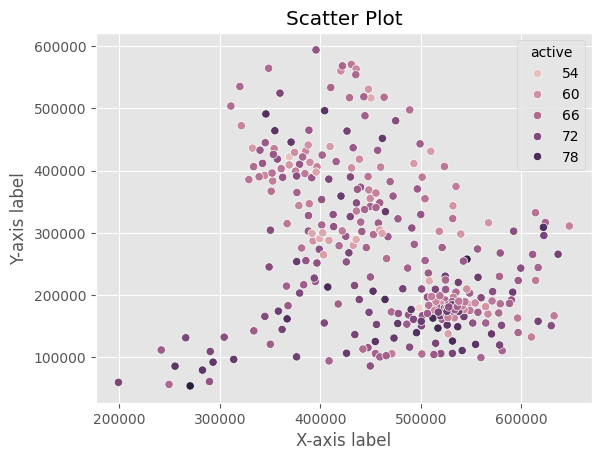

In [165]:
# Plotting centroids as a sanity check
sns.scatterplot(data=geo_gdf, x='x', y='y', hue = 'active')
# Add labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot')

In [167]:
# Changing scale of distances to km
x = geo_gdf['x']/1000
y = geo_gdf['y']/1000
active = geo_gdf['active']
coords = np.column_stack((x,y))

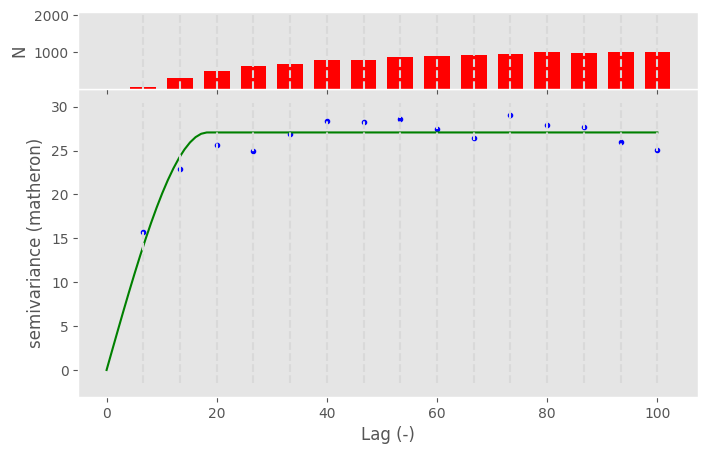

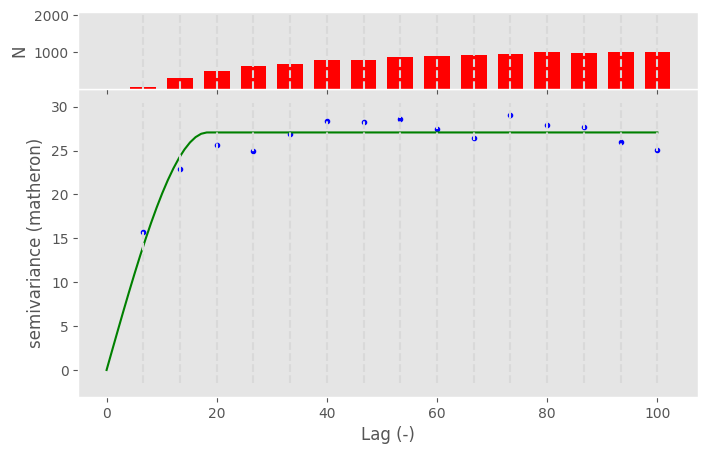

In [171]:
# plotting variogram
V = skg.Variogram(coords, active, normalize=False, maxlag=100, n_lags=15)
V.plot()

In [ ]:
!pip install spatial-kfold
from spatialkfold.clusters import spatial_kfold_clusters

In [124]:
gdf = geo_gdf.copy()
gdf.geometry = gdf.geometry.centroid
gdf.set_crs('EPSG:27700', inplace=True)

ames_clusters = spatial_kfold_clusters (gdf=gdf, name='local_authority', nfolds=10, algorithm='kmeans', random_state=569)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


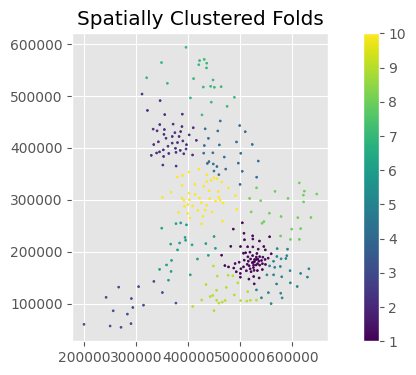

In [125]:

fig, ax = plt.subplots(1,1 , figsize=(9, 4))
ames_clusters.plot(column='folds', ax=ax,  markersize = 2, legend=True)
ax.set_title('Spatially Clustered Folds')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


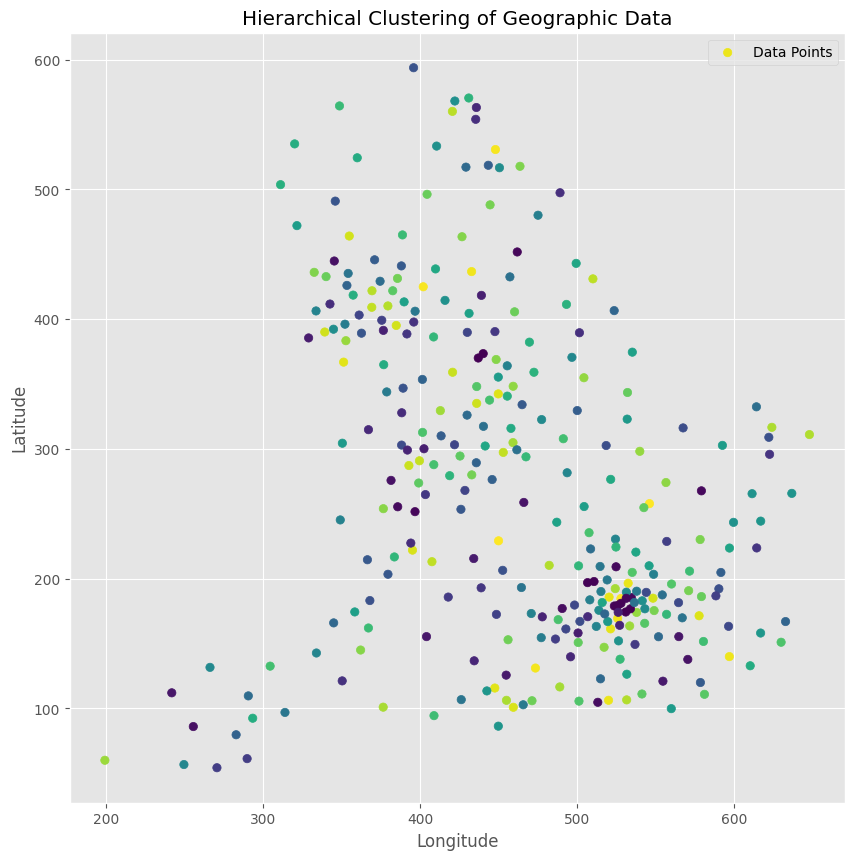

In [170]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

# Calculate pairwise distances between points
data = np.column_stack((x, y))
distances = squareform(pdist(data))

# Set the maximum distance for cluster membership
max_distance = 50.0  # Adjust this value as needed

# Perform hierarchical clustering
clustering = AgglomerativeClustering(distance_threshold=max_distance, n_clusters=None, linkage='average')
labels = clustering.fit_predict(distances)

# Plot the clusters
plt.figure(figsize=(10, 10))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hierarchical Clustering of Geographic Data')
plt.legend()
plt.show()


In [163]:
clustering.n_clusters_

43